<a href="https://colab.research.google.com/github/pratikjori20/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <B> Play Store App Review Data Analysis

In [1]:
# Importing necessery libraries for the dataset analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
# using pandas library and 'read_csv' function to read 'Play Store Data csv file as file already formated for us from Almabetter
playstore_data_path = '/content/drive/MyDrive/Copy of Play Store Data.csv'
df=pd.read_csv(playstore_data_path)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [40]:
# check the info from the Dataset to know basic of the column and its format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [41]:
#check the columns labels
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

<B> Understanding, Data Wrangling and Cleaning

In [42]:
#check is there duplictes in the given dataset and delete it.
df.drop_duplicates()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [43]:
df.count()

App               10841
Category          10841
Rating             9367
Reviews           10841
Size              10841
Installs          10841
Type              10840
Price             10841
Content Rating    10840
Genres            10841
Last Updated      10841
Current Ver       10833
Android Ver       10838
dtype: int64

In [44]:
# need to find out the what columns have null values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [45]:
df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df['Price'].value_counts()

0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$1.75         1
$14.00        1
$4.85         1
$46.99        1
$1.04         1
Name: Price, Length: 93, dtype: int64

In [47]:
# there is special character in the coulmn 'Price' need to correct it
# there is 'Everyone' at 10472 in price column that need to replace in int
df['Price'] = df.Price.apply(lambda x: x.strip('$'))
df['Price'] = df.Price.replace('Everyone', np.NaN)

In [48]:
#convert price in numeric

df['Price'] = pd.to_numeric(df['Price'])

In [49]:
df['Reviews'].value_counts()

0         596
1         272
2         214
3         175
4         137
         ... 
342912      1
4272        1
5517        1
4057        1
398307      1
Name: Reviews, Length: 6002, dtype: int64

In [50]:
# there is '3.0M' in the 'Reviews' column that need to replace to get int
df['Reviews'] = df.Reviews.apply(lambda x: x.replace('3.0M','3'))
df['Reviews'] = pd.to_numeric(df['Reviews'])

In [53]:
# convert size column in numeric
# remove the charcter from the column
df['Size'] = df.Size.apply(lambda x: x.replace(',',''))
df['Size'] = df.Size.apply(lambda x: x.strip('+'))

# there is '19M' is showing as string need to be fixed using E6 to convert in numeric
df['Size'] = df.Size.apply(lambda x: x.replace('M','E6'))

# convert '201k' is need to fix using E3
df['Size'] = df.Size.apply(lambda x: x.replace('k','E3'))

# "varies with device" need to be fix
df['Size'] = df.Size.replace('Varies with device', np.NaN)

In [54]:
df['Size'] = pd.to_numeric(df['Size'])

In [55]:
df['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: Installs, dtype: int64

In [58]:
# remove the charcter from the column
df['Installs'] = df.Installs.apply(lambda x: x.strip('+'))
df['Installs'] = df.Installs.apply(lambda x: x.replace(',',''))

# string "Free" at position 10472 need to fix
df['Installs'] = df.Installs.replace('Free', np.NaN)

In [59]:
df['Installs'] = pd.to_numeric(df['Installs'])

In [60]:
# now check the info of the given dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            9146 non-null   float64
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.1+ MB


<B> In our case, missing data that is observed does not need too much special treatment. looking at data set we can move further, column 'Android Ver', 'Last Updated and 'Current Ver' are not much significant and irrelevent we dont need to append that values so we can drop that column. Therefore moving forword handling  of the missing data.

In [61]:
# we will ignore the some column which will not that much affect on the data sheet
df.drop(['Last Updated', 'Current Ver','Android Ver'], axis=1, inplace = True)

In [62]:
# Decsribe the given dataset
df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
count,10841,10841,9367.000000,1.084100e+04,9.146000e+03,1.084000e+04,10840,10840.000000,10840,10841
unique,9660,34,NaN,NaN,NaN,NaN,3,NaN,6,120
top,ROBLOX,FAMILY,NaN,NaN,NaN,NaN,Free,NaN,Everyone,Tools
freq,9,1972,NaN,NaN,NaN,NaN,10039,NaN,8714,842
mean,NaN,NaN,4.193338,4.441119e+05,2.151418e+07,1.546434e+07,NaN,1.027368,NaN,NaN
std,NaN,NaN,0.537431,2.927629e+06,2.258863e+07,8.502936e+07,NaN,15.949703,NaN,NaN
min,NaN,NaN,1.000000,0.000000e+00,1.000000e+03,0.000000e+00,NaN,0.000000,NaN,NaN
25%,NaN,NaN,4.000000,3.800000e+01,4.900000e+06,1.000000e+03,NaN,0.000000,NaN,NaN
50%,NaN,NaN,4.300000,2.094000e+03,1.300000e+07,1.000000e+05,NaN,0.000000,NaN,NaN
75%,NaN,NaN,4.500000,5.476800e+04,3.000000e+07,5.000000e+06,NaN,0.000000,NaN,NaN


<B> No of Apps in each category

In [63]:
# find the unique and and value counts to plot the graph usinf matplotlib library
num_category = len(df['Category'].unique())
num_app_category = df['Category'].value_counts()
sorted_num_app = num_app_category.sort_values(ascending=False)

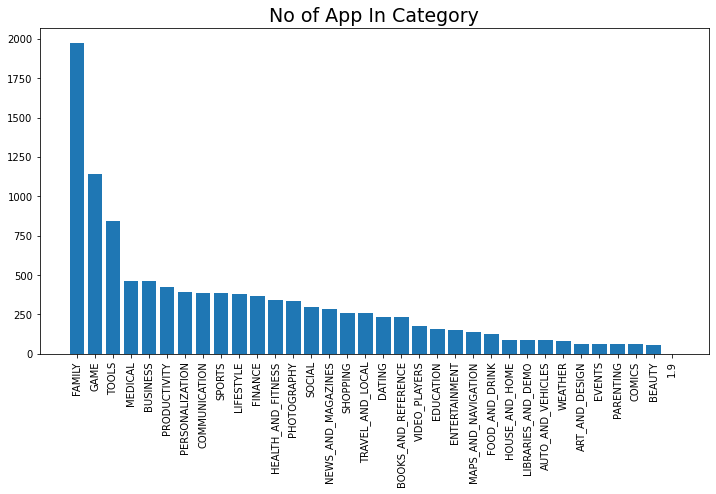

In [64]:
plt.figure(figsize = (12,6))
plt.bar(x = num_app_category.index,
        height= num_app_category.values)

plt.xticks(rotation='vertical')
plt.title('No of App In Category',size=19)

plt.show()

Text(0.5, 1.0, 'Rating Of App')

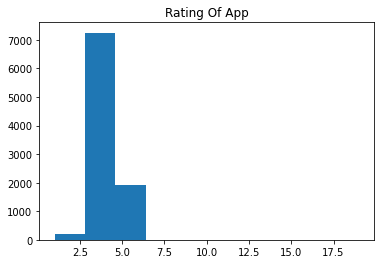

In [66]:
# histogramical representation of 'Ratings of App'
plt.hist(x= df['Rating'])
plt.title('Rating Of App')



Text(0.5, 1.0, 'Distribution Of Rating')

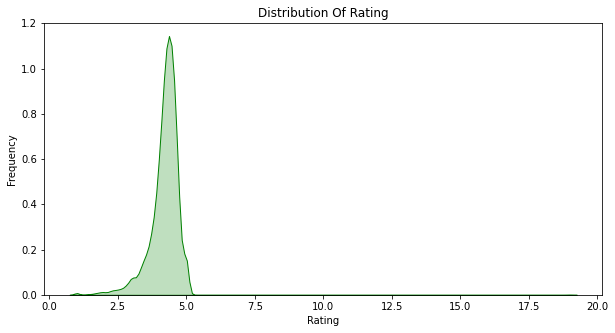

In [67]:
# Distribution of Rating
plt.figure(figsize=(10,5))
plt.xlabel('Rating')
plt.ylabel('Frequency')

sns.kdeplot(df.Rating,color='green', shade=True)
plt.title('Distribution Of Rating')

<B> Percentage of Free vs Paid App

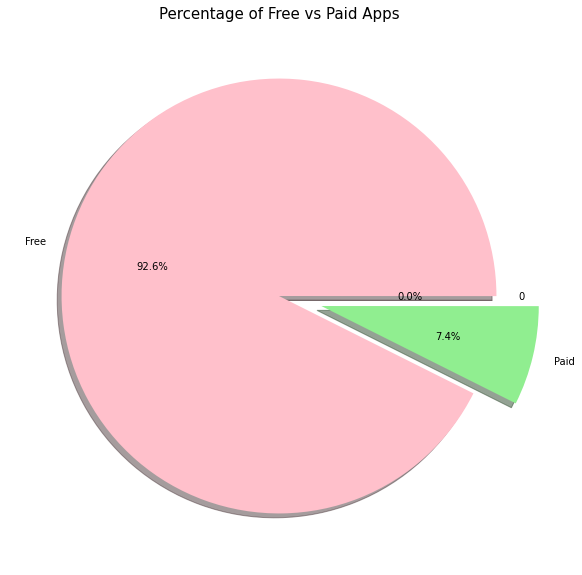

In [69]:
# plot the pie chart showing the free vs paid app
plt.figure(figsize=(10,10))
labels = df['Type'].value_counts(sort = True).index
size = df['Type'].value_counts(sort = True)
colors = ['pink', 'lightgreen']
explode = (0,0.2,0)
plt.pie(size, labels=labels, explode=explode, colors=colors, autopct='%1.1f%%',shadow=True, startangle=0)
plt.title('Percentage of Free vs Paid Apps', size= 15)
plt.show()